# Part II - Ford GoBike Dataset: Communicating Data Findings
## by Osama Sakr

## **Investigation Overview**  

This presentation explores key patterns in the **Ford GoBike bike-sharing dataset**, focusing on **trip duration, usage trends, user types, and station demand**. The goal is to highlight important insights that explain how and when people use the service.  

### **Key Insights:**  
- **Most trips are short, typically under 500 seconds** (about 8 minutes), with only a few extending beyond 1200 seconds (20 minutes).  
- **Bike usage peaks during commuting hours (7–9 AM and 4–6 PM), with lower demand during late-night and early-morning hours**.  
- **Weekday trips are significantly higher than weekend trips**, indicating that the system is primarily used for commuting.  
- **Customers (casual users) take longer trips on average compared to Subscribers (regular users)**.  
- **Female users tend to have slightly longer trip durations than Male users**.  
- **Certain station pairs have consistently high trip counts, indicating key commuter routes that may require more bike availability**.  

---


## **Dataset Overview and Executive Summary**  

The **Ford GoBike dataset** contains information on trips taken in **February 2019**, including **trip duration, start and end times, user type, gender, and station locations**. The analysis focuses on identifying patterns in how different users interact with the service.  

### **Summary of Findings:**  
1. **Trip Duration:** Most trips are short, and longer trips are rare.  
2. **Peak Usage Times:** Highest ridership occurs during commuting hours, with lower usage at night.  
3. **Weekday vs. Weekend Trends:** More trips occur on weekdays, confirming that the system is primarily used for work commutes.  
4. **User Type Differences:** Customers take longer trips, while Subscribers have shorter, more consistent rides.  
5. **Gender Trends:** Males take more trips overall, but females tend to have slightly longer ride durations.  
6. **Popular Routes:** Some station pairs experience much higher trip counts, suggesting high-demand routes that may need operational adjustments.

In [ ]:

# Importing all the necessary libraries and setting plots to be inline
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter("ignore")
%matplotlib inline

In [ ]:

# Reading the Ford Gobike dataset
df=pd.read_csv("cleaned_ford_gobike.csv")

In [ ]:

# Function to display a plot with a title and axis labels
def shape_show(title, x_label, y_label):
    """
    Displays a plot with a given title and axis labels.
    
    Parameters:
    - title (str): The title of the plot.
    - x_label (str): Label for the x-axis.
    - y_label (str): Label for the y-axis.
    """
    plt.title(title)  # Set the plot title
    plt.xlabel(x_label)  # Set the x-axis label
    plt.ylabel(y_label)  # Set the y-axis label
    plt.show()  # Display the plot

### **1. What are the most common trip durations?**

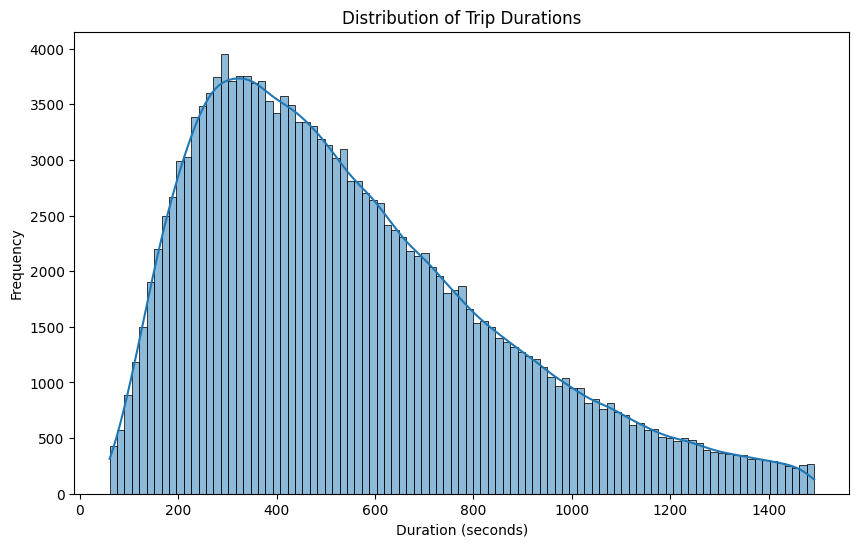

In [ ]:

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a histogram with a kernel density estimate (KDE) to show distribution
sns.histplot(df['duration_sec'], kde=True)
# Display the plot with title and axis labels
shape_show('Distribution of Trip Durations','Duration (seconds)','Frequency')

#### **Visualization Explanation**  
The histogram above shows the distribution of **trip durations** in seconds. The x-axis represents the **trip duration**, while the y-axis represents the **number of trips** taken for each duration range.  

#### **Key Observations**  
- **Most trips are relatively short**, with the highest frequency occurring around **200 to 500 seconds (3 to 8 minutes)**.  
- **The number of trips decreases as duration increases**, showing a **right-skewed distribution**, meaning long trips are less common.  
- **Trips longer than 1,200 seconds (20 minutes) are rare**, indicating that most users rely on the service for short-distance travel.  

This insight suggests that the **Ford GoBike system is primarily used for quick and efficient transportation, likely for commuting or short errands**. The data supports optimizing the system for high turnover and availability rather than extended-use trips.  

### **2. How does bike usage differ across weekdays and weekends?**

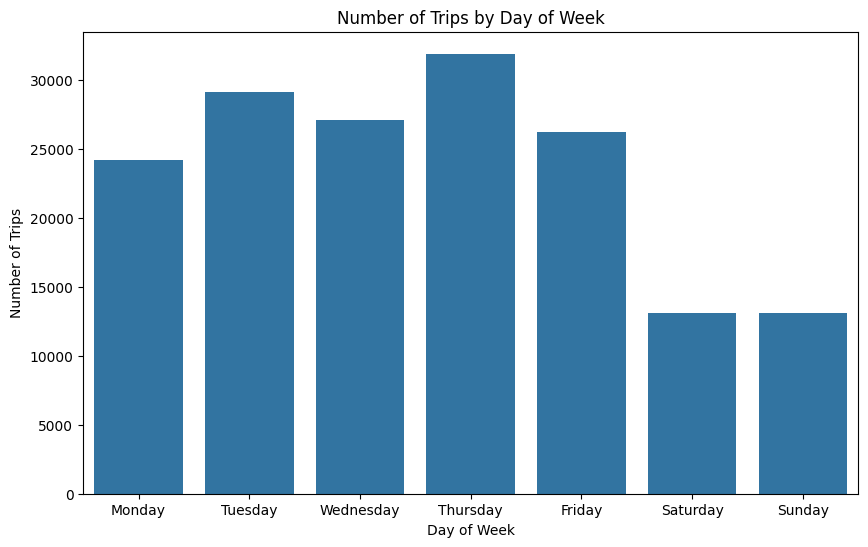

In [ ]:

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a count plot to show the number of trips for each day of the week
# The 'order' parameter ensures the days are displayed in the correct sequence
sns.countplot(data=df, x='start_day_of_week',
              order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
# Display the plot with title and axis labels+
shape_show('Number of Trips by Day of Week','Day of Week','Number of Trips')

#### **Visualization Explanation**  
The bar chart above illustrates the **number of trips taken on each day of the week**. The x-axis represents the **day of the week**, while the y-axis shows the **number of trips** recorded.  

#### **Key Observations**  
- **Bike usage is highest on weekdays**, peaking on **Thursday** with over 30,000 trips.  
- **Tuesday and Wednesday also see high usage**, indicating that **bikes are primarily used for commuting**.  
- **Bike usage drops significantly on weekends**, with **Saturday and Sunday having the lowest number of trips**.  
- The decline in usage during weekends suggests that the Ford GoBike system is primarily **used by daily commuters rather than recreational riders**.  

This insight highlights an **opportunity to optimize bike availability for weekday commuters** while considering strategies to **increase engagement during weekends**, such as promotions or leisure-focused routes.  

### **3. How does trip duration vary by user type (Subscriber vs. Customer)?**

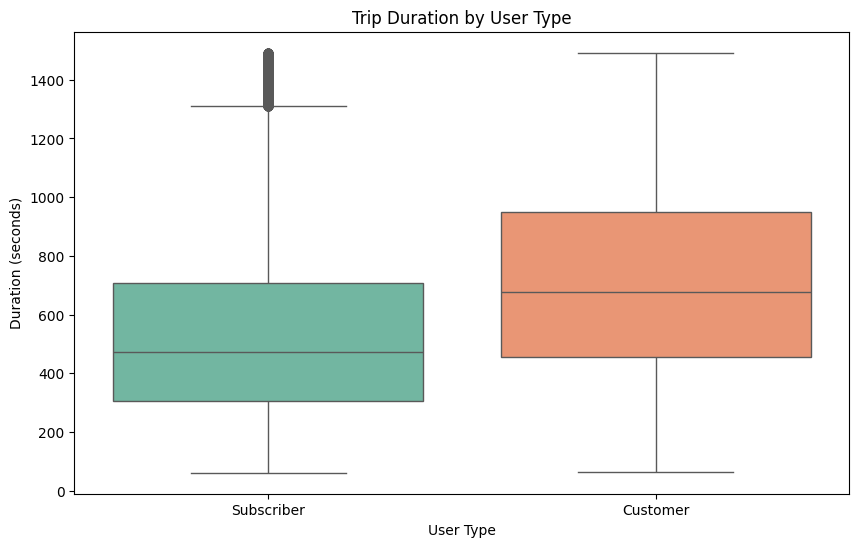

In [6]:

# Set the figure size for better visibility
plt.figure(figsize=(10, 6))
# Create a box plot to show the distribution of trip duration for each user type
# 'palette' is used to set distinct colors for better differentiation
sns.boxplot(data=df, x='user_type', y='duration_sec', palette='Set2')
# Display the plot with title and axis labels
shape_show('Trip Duration by User Type','User Type','Duration (seconds)')

#### **Visualization Explanation**  
The box plot above compares **trip durations** between two user groups:  
- **Subscribers**: Regular users with memberships  
- **Customers**: Occasional riders without a subscription  

The x-axis represents the **user type**, while the y-axis shows **trip duration in seconds**.  

#### **Key Observations**  
- **Customers tend to take longer trips** compared to subscribers.  
- The **median trip duration** for customers is higher than that of subscribers.  
- **Subscribers have a more consistent trip duration**, with fewer extreme values.  
- Customers show **greater variation** in trip length, with **several long-duration trips** recorded.  

This suggests that **subscribers primarily use the service for short, routine trips (likely for commuting), whereas customers take longer rides, possibly for leisure or tourism**.  

These insights could help **tailor pricing, promotions, and service enhancements** for each user group.  

### **4. What are the most common bike routes?**

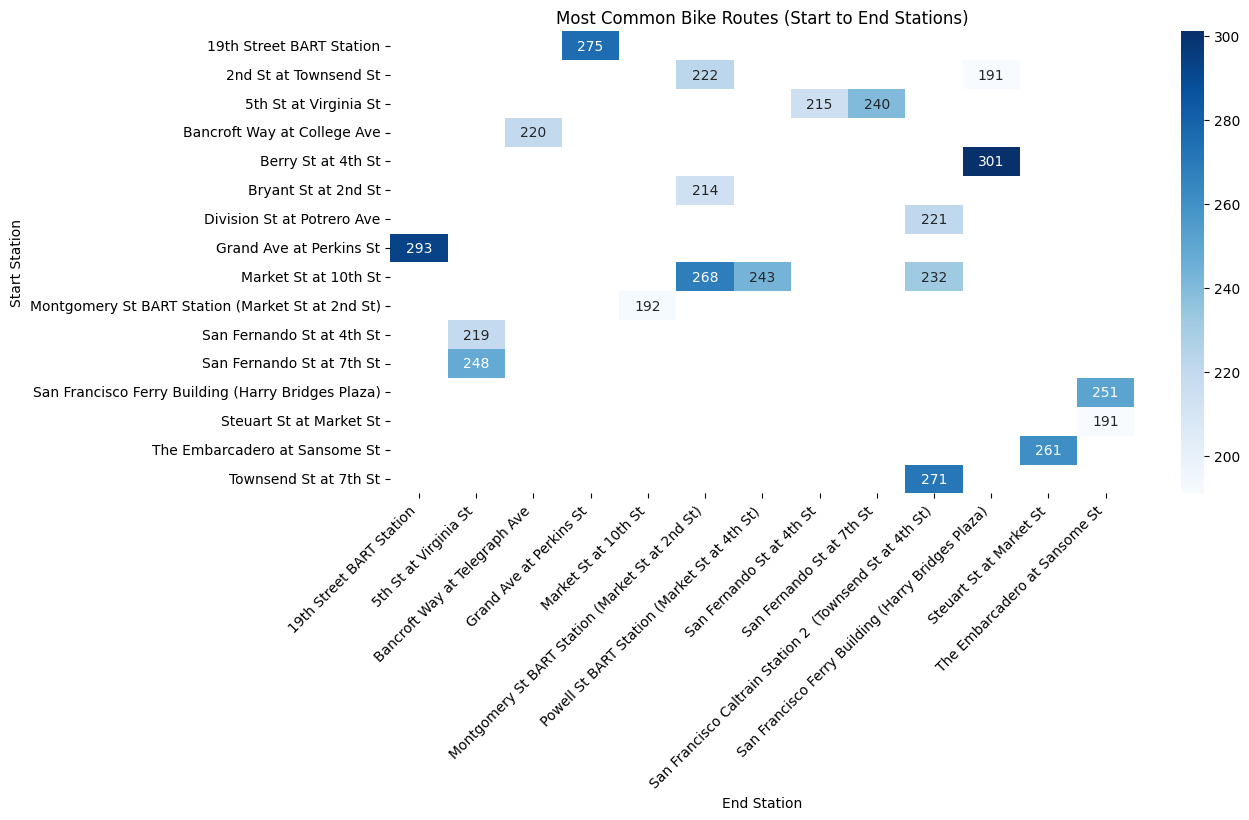

In [7]:

# Group the data by start and end station, counting the number of trips for each route
top_routes = df.groupby(['start_station_name', 'end_station_name']).size().reset_index(name='count')
# Sort the routes by trip count in descending order and select the top 20 most frequent routes
top_routes = top_routes.sort_values(by='count', ascending=False).head(20)
# Create a pivot table for visualization, setting start stations as rows and end stations as columns
pivot_table = top_routes.pivot(index='start_station_name', columns='end_station_name', values='count')
# Set figure size for better readability
plt.figure(figsize=(12, 6))
# Create a heatmap to visualize the most common routes
sns.heatmap(pivot_table, cmap='Blues', annot=True, fmt=".0f")
# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
# Display the plot with title and axis labels
shape_show('Most Common Bike Routes (Start to End Stations)','End Station','Start Station')

#### **Visualization Explanation**  
The heatmap above displays the **most frequently used bike routes** between start and end stations.  
- The **x-axis** represents **end stations**, while the **y-axis** represents **start stations**.  
- The **shading intensity** indicates trip frequency, with **darker shades signifying higher usage**.  
- The **numbers within the boxes** show the actual trip count for the respective route.  

#### **Key Observations**  
- The **most popular route** is from **Berry St at 4th St → San Fransico Ferry Building**, with **301 trips**.  
- Other highly used routes include:  
  - **Grand Ave at Perkins St → 19th street BART station** (**293 trips**)  
  - **19th street BART station → Grand Ave at Perkins St** (**275 trips**)  
  - **Townsend St at 7th St → San Fransico Caltrain Station 2** (**271 trips**)  
- **Routes with transit hubs (BART stations, ferry terminals, or Caltrain stations) are frequently used**, likely due to **commuters using bikes for first/last-mile connectivity**.  

#### **Implications**  
- **Bike-sharing operators** could optimize services by placing **more bikes at high-demand stations**.  
- **City planners** can use this data to **enhance bike lanes on popular routes** to improve safety and accessibility.  

### **5. How does trip duration vary by time of day and user type?**

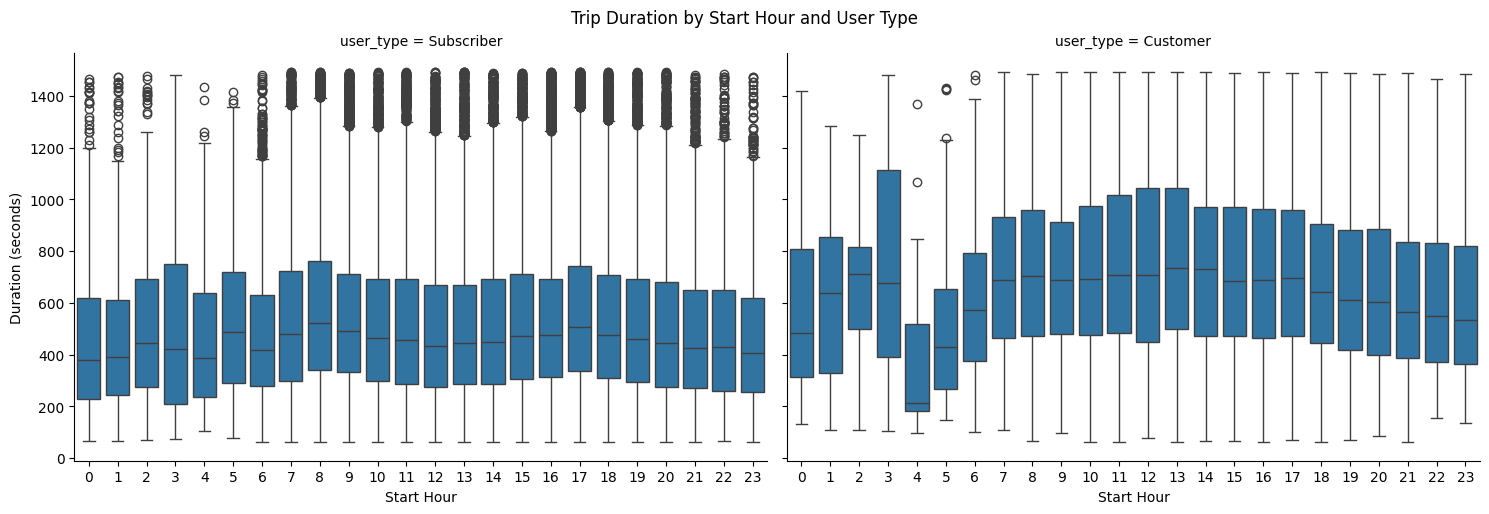

In [8]:

# Create a FacetGrid to plot boxplots of trip duration by start hour for each user type
grid = sns.FacetGrid(data=df, col='user_type', height=5, aspect=1.5)
# Map a boxplot onto the grid, plotting start hour on the x-axis and duration on the y-axis
grid.map(sns.boxplot, 'start_hour', 'duration_sec')
# Set axis labels
grid.set_axis_labels('Start Hour', 'Duration (seconds)')
# Set the overall title for the figure
grid.figure.suptitle('Trip Duration by Start Hour and User Type', y=1.02)
# Display the plot
plt.show()

#### **Visualization Explanation**  
The boxplots above display the **trip duration distribution** across different **hours of the day** for **Subscribers** (left) and **Customers** (right).  
- The **x-axis** represents the **starting hour of the trip**.  
- The **y-axis** represents the **trip duration (in seconds)**.  
- The **spread of the boxes** shows the interquartile range (IQR), while **whiskers and dots** represent **outliers**.  

#### **Key Observations**  
- **Subscribers**  
  - Their median trip durations remain **consistent across all hours**, mostly under **700 seconds (11 minutes)**.  
  - Outliers appear throughout the day, indicating some longer trips.  
  - No **strong peak hours** all over the trips.  
- **Customers**  
  - **More variation in trip durations** compared to Subscribers.  
  - Median trip durations are **higher**, especially between **10 AM - 4 PM**.  
  - Trip durations are **much longer during late-night and early-morning hours**.  
  - Some **outliers**, suggesting **occasional very long rides**.  

#### **Implications**  
- **Subscribers use bikes for short, consistent trips**, likely for commuting.  
- **Customers take longer trips, possibly for leisure or tourism**, especially during mid-day and late-night hours.  
- **Bike-sharing companies** could **target promotions** towards tourists at peak leisure hours while ensuring enough bikes are available for commuters during rush hours.  